# Challenge 1: Classification
In this challenge, you're given a food classification dataset which has 101 classes. You need to analyze and preprocess the dataset as well as build deep learning models for performing food classification. 
<br>
Three models are to be trained for this task, mainly light, medium, and heavy model. <br>
Examples: <br>
Light model - mobilenetv2 <br>
Medium model - Resnet50 <br>
Heavy model - VGG19 <br>
<br>
The above given models are examples. You are free to choose any deep learning model to train. 

**Main Objective**:
You are supposed to use both TensorFlow and PyTorch for this task. You need to train one model for each framework. (You can use one of the frameworks again for the third model)

## Summary 

Create a table for your train and test accuracy as well as speed for each model (mention the framework used for training)

# Analyze the dataset
## Objectives
1. Upload the dataset provided (Google Drive link). 
2. Extract the dataset. 
3. Re-arrange dataset into training and testing folders. 
4. List number of samples in training and testing folders. 
5. Plot sample images from training and testing datasets. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
import glob
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree

### Your Response/Notes

You can summarize your work for this section here/give any explanations if required. 


In [ ]:
# Extract the dataset
!unzip /content/drive/MyDrive/food-101.zip

### Download Data

In [2]:
def get_data():
    if "food-101" in os.listdir():
        print('Dataset already exists.')
    else:
        print('Downloading the data...')
        !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
        print('Dataset downloaded!')
        print('Extracting data..')
        !tar xzvf food-101.tar.gz
        print("Extraction done!")

In [3]:
get_data()

Dataset already exists.


In [4]:
!ls food-101/

README.txt  images  license_agreement.txt  meta


In [5]:
!ls food-101/images

apple_pie	    eggs_benedict	     onion_rings
baby_back_ribs	    escargots		     oysters
baklava		    falafel		     pad_thai
beef_carpaccio	    filet_mignon	     paella
beef_tartare	    fish_and_chips	     pancakes
beet_salad	    foie_gras		     panna_cotta
beignets	    french_fries	     peking_duck
bibimbap	    french_onion_soup	     pho
bread_pudding	    french_toast	     pizza
breakfast_burrito   fried_calamari	     pork_chop
bruschetta	    fried_rice		     poutine
caesar_salad	    frozen_yogurt	     prime_rib
cannoli		    garlic_bread	     pulled_pork_sandwich
caprese_salad	    gnocchi		     ramen
carrot_cake	    greek_salad		     ravioli
ceviche		    grilled_cheese_sandwich  red_velvet_cake
cheese_plate	    grilled_salmon	     risotto
cheesecake	    guacamole		     samosa
chicken_curry	    gyoza		     sashimi
chicken_quesadilla  hamburger		     scallops
chicken_wings	    hot_and_sour_soup	     seaweed_salad
chocolate_cake	    hot_dog		     shrimp_and_grits
chocolate_mousse    huevo

In [6]:
!ls food-101/meta

classes.txt  labels.txt  test.json  test.txt  train.json  train.txt


**Re-arranging dataset into folders**

In [7]:
# Function to re-arrange the dataset
def prepare_data(filepath, src, dest):
    classes_images = defaultdict(list)
    with open(filepath, 'r') as txt:
        paths = [read.strip() for read in txt.readlines()]
        for p in paths:
            food = p.split('/')
            classes_images[food[0]].append(food[1] + '.jpg')
        
    for food in classes_images.keys():
        print("\nCopying images into ",food)
        if not os.path.exists(os.path.join(dest,food)):
            os.makedirs(os.path.join(dest,food))
        for i in classes_images[food]:
            copy(os.path.join(src,food,i), os.path.join(dest,food,i))
    print("Copying Done!")

In [11]:
# create training data
prepare_data('food-101/meta/train.txt','food-101/images','train')


Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying images into  croque_madam

In [4]:
n_samples = [len(os.listdir(os.path.join('train', folder))) for folder in os.listdir('train')]
print("Total number of samples in train folder:", sum(n_samples))

Total number of samples in train folder: 75750


In [14]:
# create testing data
prepare_data('food-101/meta/test.txt','food-101/images','test')


Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying images into  croque_madam

In [5]:
n_samples = [len(os.listdir(os.path.join('test', folder))) for folder in os.listdir('test')]
print("Total number of samples in test folder:", sum(n_samples))

Total number of samples in test folder: 25250


# Pre-process Images
## Objectives
1. Implement preprocessing codes for each model. 
2. Augment the dataset. 
3. Preview the preprocessed dataset. 

### Your Response/Notes

You can summarize your work for this section here/give any explanations if required. 


### Preprocessing steps for light model


### Preprocessing steps for medium model

In [6]:
# Import necessary PyTorch libraries
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Check whether GPU is available and if it is then use GPU
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [8]:
# Data augmentation
train_transforms = transforms.Compose([transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomVerticalFlip(),
                                       transforms.RandomRotation(45),
                                       transforms.RandomAffine(45),
                                       transforms.ColorJitter(),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                            std=[0.229, 0.224, 0.225])])

# Use 10-crop for Test Time Augmentation
test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.TenCrop(224),
                                      transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
                                      transforms.Lambda(lambda crops: torch.stack([transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])(crop) for crop in crops]))])

# Load the datasets with ImageFolder
train_data = datasets.ImageFolder("train", transform=train_transforms)
test_data = datasets.ImageFolder("test", transform=test_transforms)

# Using the image datasets and the tranforms, define the dataloaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size= 64, shuffle = True)

In [9]:
# print out some data stats
print('Number of training images: ', len(train_data))
print('Number of testing images: ', len(test_data))

with open('food-101/meta/classes.txt', 'r') as txt:
    classes = [l.strip() for l in txt.readlines()]
print('Number of classes: ', len(classes))    

# Analyzing the shape of one batch
train_images, train_labels = next(iter(train_loader))
test_images, test_labels = next(iter(test_loader))

print('Shape of first batch of training images: ', train_images.shape)
print('Shape of first batch of test images: ', test_images.shape) # 5-D array because of 10 crops

Number of training images:  75750
Number of testing images:  25250
Number of classes:  101
Shape of first batch of training images:  torch.Size([64, 3, 224, 224])
Shape of first batch of test images:  torch.Size([64, 10, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

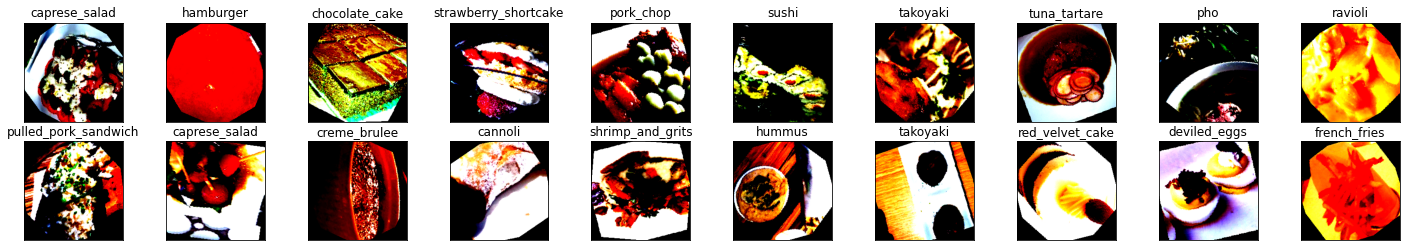

In [10]:
# Visualize some sample training data after Data augmentation

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

### Preprocessing steps for heavier model

# Training different models
## Objectives
1. Obtain 90% accuracy in all the models trained. 
2. You're free to use any techniques for traning such as transfer learning, knowledge transfer, etc. 
3. The models should not overfit the training dataset. 
4. Measure the performance in terms of accuracy and speed of each model. 
5. Visualize the training and testing performance using TensorBoard. 

#### Optional:
1. Apply weight quantization to increase the speed of the models. 

### Your Response/Notes

You can summarize your work for this section here/give any explanations if required. 


## Train Light model

## Train Medium model

In [1]:
# Transfer Learning

In [16]:
# Load the ResNet-50 model pretrained on ImageNet 
model = models.resnet50(pretrained=True)
print(model)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1,

In [18]:
# Freeze the initial layers
for param in model.parameters():
    param.requies_grad = False
  
# Replace the final fully connected layer with new fully connected layer (randomly initialized weights)
# that outputs 101 units (based on our dataset)
classifier = nn.Linear(2048, 101)
model.fc = classifier
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [19]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent with momentum)
optimizer = optim.SGD(model.fc.parameters(), lr=0.01, momentum=0.9)

# secify learning rate scheduler (if there is no further decrease in loss for next 5 epochs 
# then lower the learning rate by 0.1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience = 5)

In [ ]:

# Move the model to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

# number of epochs to train the model
n_epochs = 60

valid_loss_min = np.Inf # track change in validation loss

ctr = 0
for epoch in range(1, n_epochs+1):
    # keep track of training and validation loss
    train_loss = 0.0
    train_accuracy = 0.0
    valid_loss = 0.0
    val_accuracy = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        # Calculate training accuracy
        top_p, top_class = output.topk(1, dim=1)
        equals = top_class == target.view(*top_class.shape)
        train_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    with torch.no_grad():
        for data, target in test_loader:
            # move tensors to GPU if CUDA is available
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            
            ## For 10-crop Testing
            input_var = torch.autograd.Variable(data, volatile=True)
            target_var = torch.autograd.Variable(target, volatile=True)
            bs, ncrops, c, h, w = input_var.size()
            # forward pass: compute predicted outputs by passing inputs to the model
            temp_output = model(input_var.view(-1, c, h, w))
            output = temp_output.view(bs, ncrops, -1).mean(1)
            # calculate the batch loss
            loss = criterion(output, target_var)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)
            # Calculate validation accuracy
            top_p, top_class = output.topk(1, dim=1)
            equals = top_class == target.view(*top_class.shape)
            val_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()*data.size(0)
    
    # calculate average losses and accuracies
    train_loss = train_loss/len(train_loader.dataset)
    train_accuracy = train_accuracy/len(train_loader.dataset)
    valid_loss = valid_loss/len(test_loader.dataset)
    val_accuracy = val_accuracy/len(test_loader.dataset)
    # Learning rate scheduler step
    scheduler.step(valid_loss) 
    
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.4f} \tTraining Accuracy: {:.4f} \tValidation Loss: {:.4f} \tValidation Accuracy: {:.4f}'.format(
        epoch, train_loss, train_accuracy, valid_loss, val_accuracy))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
        
        checkpoint = {"model": model,
                      "criterion": criterion,
                      "epochs": epoch,
                      "optimizer_state": optimizer.state_dict(),
                      "model_state": model.state_dict(),
                      "valid_loss_min": valid_loss}
    
        # save model in colab
        torch.save(checkpoint, 'res50_model_checkpoint.pth')
        valid_loss_min = valid_loss
        ctr = 0
    else:
        ctr = ctr + 1
        if ctr == 10:
            break

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Epoch: 1 	Training Loss: 2.8790 	Training Accuracy: 0.3258 	Validation Loss: 2.2545 	Validation Accuracy: 0.4469
Validation loss decreased (inf --> 2.254458).  Saving model ...
Epoch: 2 	Training Loss: 2.7230 	Training Accuracy: 0.3551 	Validation Loss: 2.1426 	Validation Accuracy: 0.4601
Validation loss decreased (2.254458 --> 2.142647).  Saving model ...
Epoch: 3 	Training Loss: 2.6647 	Training Accuracy: 0.3681 	Validation Loss: 2.1306 	Validation Accuracy: 0.4609
Validation loss decreased (2.142647 --> 2.130635).  Saving model ...
Epoch: 4 	Training Loss: 2.6409 	Training Accuracy: 0.3739 	Validation Loss: 2.0626 	Validation Accuracy: 0.4877
Validation loss decreased (2.130635 --> 2.062610).  Saving model ...
Epoch: 5 	Training Loss: 2.6040 	Training Accuracy: 0.3826 	Validation Loss: 2.0210 	Validation Accuracy: 0.4883
Validation loss decreased (2.062610 --> 2.021015).  Saving model ...
Epoch: 6 	Training Loss: 2.5847 	Training Accuracy: 0.3856 	Validation Loss: 1.9844 	Validation

In [2]:
# Fine Tuning
# Unfreezing all the layers and training on ResNet50

In [10]:
# Load the saved model from last checkpoint
checkpoint = torch.load("res50_model_checkpoint.pth", map_location='cpu')

# Use entire network for training
model = models.resnet50(pretrained=False)
# for param in model.parameters():
#   param.requires_grad = False

    
classifier = nn.Linear(2048, 101)
model.fc = classifier

model.load_state_dict(checkpoint['model_state'], strict=False)

# specify loss function (categorical cross-entropy) same as used earlier
criterion = nn.CrossEntropyLoss()

# specify optimizer same as used earlier
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# secify scheduler same as used earlier
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience = 5)

# Check the saved model's last epoch and last validation loss
valid_loss = checkpoint["valid_loss_min"] 
num_epoch = checkpoint['epochs']

In [11]:
print(num_epoch)
print(valid_loss)

25
1.7001736634698246


In [12]:
import time

In [ ]:
# Move the model to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

# number of epochs to train the model 
n_epochs = 60  # new number of epochs

valid_loss_min = valid_loss # track change in validation loss
ctr = 0

for epoch in range(num_epoch+1, n_epochs+1):
    # keep track of training and validation loss
    start = time.time()
    train_loss = 0.0
    train_accuracy = 0.0
    valid_loss = 0.0
    val_accuracy = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        # Calculate training accuracy
        top_p, top_class = output.topk(1, dim=1)
        equals = top_class == target.view(*top_class.shape)
        train_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    with torch.no_grad():
        for data, target in test_loader:
            # move tensors to GPU if CUDA is available
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            
            ## For 10-crop Testing
            input_var = torch.autograd.Variable(data, volatile=True)
            target_var = torch.autograd.Variable(target, volatile=True)
            bs, ncrops, c, h, w = input_var.size()
            # forward pass: compute predicted outputs by passing inputs to the model
            temp_output = model(input_var.view(-1, c, h, w))
            output = temp_output.view(bs, ncrops, -1).mean(1)
            # calculate the batch loss
            loss = criterion(output, target_var)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)
            # Calculate validation accuracy
            top_p, top_class = output.topk(1, dim=1)
            equals = top_class == target.view(*top_class.shape)
            val_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    train_accuracy = train_accuracy/len(train_loader.dataset)
    valid_loss = valid_loss/len(test_loader.dataset)
    val_accuracy = val_accuracy/len(test_loader.dataset)
    scheduler.step(valid_loss)
    
    end = time.time()
    
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.4f} \tTraining Accuracy: {:.4f} \tValidation Loss: {:.4f} \tValidation Accuracy: {:.4f} \tTime: {:.4f}'.format(
        epoch, train_loss, train_accuracy, valid_loss, val_accuracy, end-start))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
        
        checkpoint = {"model": model,
                      "criterion": criterion,
                      "epochs": epoch,
                      "optimizer_state": optimizer.state_dict(),
                      "model_state": model.state_dict(),
                      "valid_loss_min": valid_loss}
        
        # Save model to drive
        model_save_name = 'resnet50model.pth'
        path = model_save_name 
        torch.save(checkpoint, path)
        
        valid_loss_min = valid_loss
        ctr = 0
    else:
        ctr = ctr + 1
        if ctr == 10:
            break

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Epoch: 26 	Training Loss: 2.2364 	Training Accuracy: 0.4556 	Validation Loss: 1.4905 	Validation Accuracy: 0.6054 	Time: 1122.1417
Validation loss decreased (1.700174 --> 1.490489).  Saving model ...
Epoch: 27 	Training Loss: 1.8193 	Training Accuracy: 0.5453 	Validation Loss: 1.3009 	Validation Accuracy: 0.6511 	Time: 1137.4314
Validation loss decreased (1.490489 --> 1.300927).  Saving model ...
Epoch: 28 	Training Loss: 1.6488 	Training Accuracy: 0.5830 	Validation Loss: 1.1240 	Validation Accuracy: 0.6964 	Time: 1133.4348
Validation loss decreased (1.300927 --> 1.123999).  Saving model ...
Epoch: 29 	Training Loss: 1.5494 	Training Accuracy: 0.6053 	Validation Loss: 1.0009 	Validation Accuracy: 0.7319 	Time: 1134.8675
Validation loss decreased (1.123999 --> 1.000874).  Saving model ...
Epoch: 30 	Training Loss: 1.4657 	Training Accuracy: 0.6261 	Validation Loss: 0.9457 	Validation Accuracy: 0.7445 	Time: 1085.5708
Validation loss decreased (1.000874 --> 0.945684).  Saving model ...


In [ ]:
# Continuing Fine Tuning

In [11]:
# Load the saved model from last checkpoint
checkpoint = torch.load("resnet50model.pth", map_location='cpu')

# Use entire network for training
model = models.resnet50(pretrained=False)
# for param in model.parameters():
#   param.requires_grad = False

    
classifier = nn.Linear(2048, 101)
model.fc = classifier

model.load_state_dict(checkpoint['model_state'], strict=False)

# specify loss function (categorical cross-entropy) same as used earlier
criterion = nn.CrossEntropyLoss()

# specify optimizer with new lr
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# secify scheduler same as used earlier
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience = 5)

# Check the saved model's last epoch and last validation loss
valid_loss = checkpoint["valid_loss_min"] 
num_epoch = checkpoint['epochs']

In [12]:
print(num_epoch)
print(valid_loss)

54
0.5289567458417156


In [13]:
import time

In [14]:
# Move the model to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

# number of epochs to train the model 
n_epochs = 60  # new number of epochs

valid_loss_min = valid_loss # track change in validation loss
ctr = 0

for epoch in range(num_epoch+1, n_epochs+1):
    # keep track of training and validation loss
    start = time.time()
    train_loss = 0.0
    train_accuracy = 0.0
    valid_loss = 0.0
    val_accuracy = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        # Calculate training accuracy
        top_p, top_class = output.topk(1, dim=1)
        equals = top_class == target.view(*top_class.shape)
        train_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    with torch.no_grad():
        for data, target in test_loader:
            # move tensors to GPU if CUDA is available
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            
            ## For 10-crop Testing
            input_var = torch.autograd.Variable(data, volatile=True)
            target_var = torch.autograd.Variable(target, volatile=True)
            bs, ncrops, c, h, w = input_var.size()
            # forward pass: compute predicted outputs by passing inputs to the model
            temp_output = model(input_var.view(-1, c, h, w))
            output = temp_output.view(bs, ncrops, -1).mean(1)
            # calculate the batch loss
            loss = criterion(output, target_var)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)
            # Calculate validation accuracy
            top_p, top_class = output.topk(1, dim=1)
            equals = top_class == target.view(*top_class.shape)
            val_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    train_accuracy = train_accuracy/len(train_loader.dataset)
    valid_loss = valid_loss/len(test_loader.dataset)
    val_accuracy = val_accuracy/len(test_loader.dataset)
    scheduler.step(valid_loss)
    
    end = time.time()
    
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.4f} \tTraining Accuracy: {:.4f} \tValidation Loss: {:.4f} \tValidation Accuracy: {:.4f} \tTime: {:.4f}'.format(
        epoch, train_loss, train_accuracy, valid_loss, val_accuracy, end-start))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
        
        checkpoint = {"model": model,
                      "criterion": criterion,
                      "epochs": epoch,
                      "optimizer_state": optimizer.state_dict(),
                      "model_state": model.state_dict(),
                      "valid_loss_min": valid_loss}
        
        # Save model to drive
        model_save_name = 'resnet50model_final.pth'
        path = model_save_name 
        torch.save(checkpoint, path)
        
        valid_loss_min = valid_loss
        ctr = 0
    else:
        ctr = ctr + 1
        if ctr == 10:
            break

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Epoch: 55 	Training Loss: 0.5617 	Training Accuracy: 0.8475 	Validation Loss: 0.5395 	Validation Accuracy: 0.8623 	Time: 1150.1936
Epoch: 56 	Training Loss: 0.5503 	Training Accuracy: 0.8489 	Validation Loss: 0.5338 	Validation Accuracy: 0.8630 	Time: 1121.6436
Epoch: 57 	Training Loss: 0.5416 	Training Accuracy: 0.8533 	Validation Loss: 0.5394 	Validation Accuracy: 0.8621 	Time: 1157.1614
Epoch: 58 	Training Loss: 0.5264 	Training Accuracy: 0.8558 	Validation Loss: 0.5385 	Validation Accuracy: 0.8637 	Time: 1126.8331
Epoch: 59 	Training Loss: 0.5228 	Training Accuracy: 0.8573 	Validation Loss: 0.5424 	Validation Accuracy: 0.8621 	Time: 1124.0523
Epoch: 60 	Training Loss: 0.5130 	Training Accuracy: 0.8603 	Validation Loss: 0.5452 	Validation Accuracy: 0.8611 	Time: 1120.2878


In [15]:
# Load the saved model from last checkpoint
checkpoint = torch.load("resnet50model.pth", map_location='cpu')

# Use entire network for training
model = models.resnet50(pretrained=False)
# for param in model.parameters():
#   param.requires_grad = False

    
classifier = nn.Linear(2048, 101)
model.fc = classifier

model.load_state_dict(checkpoint['model_state'], strict=False)

# specify loss function (categorical cross-entropy) same as used earlier
criterion = nn.CrossEntropyLoss()

# specify optimizer with new lr
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# secify scheduler same as used earlier
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience = 5)

# Check the saved model's last epoch and last validation loss
valid_loss = checkpoint["valid_loss_min"] 
num_epoch = checkpoint['epochs']

In [16]:
print(num_epoch)
print(valid_loss)

54
0.5289567458417156


In [17]:
import time

In [20]:
# Move the model to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

# number of epochs to train the model 
num_epoch = 60
n_epochs = 80  # new number of epochs

valid_loss_min = valid_loss # track change in validation loss
ctr = 6

for epoch in range(num_epoch+1, n_epochs+1):
    # keep track of training and validation loss
    start = time.time()
    train_loss = 0.0
    train_accuracy = 0.0
    valid_loss = 0.0
    val_accuracy = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        # Calculate training accuracy
        top_p, top_class = output.topk(1, dim=1)
        equals = top_class == target.view(*top_class.shape)
        train_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    with torch.no_grad():
        for data, target in test_loader:
            # move tensors to GPU if CUDA is available
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            
            ## For 10-crop Testing
            input_var = torch.autograd.Variable(data, volatile=True)
            target_var = torch.autograd.Variable(target, volatile=True)
            bs, ncrops, c, h, w = input_var.size()
            # forward pass: compute predicted outputs by passing inputs to the model
            temp_output = model(input_var.view(-1, c, h, w))
            output = temp_output.view(bs, ncrops, -1).mean(1)
            # calculate the batch loss
            loss = criterion(output, target_var)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)
            # Calculate validation accuracy
            top_p, top_class = output.topk(1, dim=1)
            equals = top_class == target.view(*top_class.shape)
            val_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    train_accuracy = train_accuracy/len(train_loader.dataset)
    valid_loss = valid_loss/len(test_loader.dataset)
    val_accuracy = val_accuracy/len(test_loader.dataset)
    scheduler.step(valid_loss)
    
    end = time.time()
    
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.4f} \tTraining Accuracy: {:.4f} \tValidation Loss: {:.4f} \tValidation Accuracy: {:.4f} \tTime: {:.4f} '.format(
        epoch, train_loss, train_accuracy, valid_loss, val_accuracy, end-start))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
        
        checkpoint = {"model": model,
                      "criterion": criterion,
                      "epochs": epoch,
                      "optimizer_state": optimizer.state_dict(),
                      "model_state": model.state_dict(),
                      "valid_loss_min": valid_loss}
        
        # Save model to drive
        model_save_name = 'resnet50model_final.pth'
        path = model_save_name 
        torch.save(checkpoint, path)
        
        valid_loss_min = valid_loss
        ctr = 0
    else:
        ctr = ctr + 1
        if ctr == 10:
            print('Early Stopping!')
            break
    print(ctr)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Epoch: 61 	Training Loss: 0.4893 	Training Accuracy: 0.8672 	Validation Loss: 0.5494 	Validation Accuracy: 0.8640 	Time: 1098.0180 
7
Epoch: 62 	Training Loss: 0.4826 	Training Accuracy: 0.8681 	Validation Loss: 0.5539 	Validation Accuracy: 0.8636 	Time: 1113.2834 
8
Epoch: 63 	Training Loss: 0.4826 	Training Accuracy: 0.8687 	Validation Loss: 0.5513 	Validation Accuracy: 0.8633 	Time: 1115.6040 
9
Epoch: 64 	Training Loss: 0.4776 	Training Accuracy: 0.8698 	Validation Loss: 0.5510 	Validation Accuracy: 0.8639 	Time: 1105.2509 
Early Stopping!


## Train heavy model